# Regression Algorithms for Extrapolation

Julie Butler Hartley

REU Machine Learning Course

June 24, 2021

## Linear Regression

Many machine learning courses and books start off with linear regression and there are a few reasons for this:

1. Linear regression is one of the most basic machine learning algorithms, but it contains all of the ingredients of a machine learning algorithm.
2. Linear regression has analytical expressions for its parameters, meaning you can find an equation that solves for the output of the algorithm.  Linear regression also has analytical expressions for the errors produced by the algorithm.
3. Linear regression has a direct link to statistical interpretations. Linear regression is also seen in statistics, though it may be called ordinary least squares.
4. Linear regression codes are easy to implement and can be solved numerically. In addition to introducing the algorithm, this tutorial will also go through the process of writing a simple linear regression code in Python.

Linear regression is typically used to fit data whose shape roughly corresponds to a polynomial, though using a design matrix allows for a lot of flexibility. Design matrices were covered in [a previous class](https://dannycaballero.info/MSU_REU_ML_course/notebooks/day-2/Day-2_Polynomial_Regression.html) (section 2.2), and can contain terms other than polynomials as well.  Linear regression can also be used for classification.

### The Mathematics

The linear regression algorithm generates data simply by multiplying a set of inputs by a set of parameters.  Mathematically this looks like:

$$\hat{y} = X\theta,$$

where $\hat{y}$ is a vector representing the output of the linear regression algorithm, X is a matrix that contains the inputs of the algorithm, and $\theta$ is a vector of parameters that when multiplied to X results in a value of $\hat{y}$ which is as close to the true data as possible.

We measure the difference between $\hat{y}$ and the data set we are trying to match (traditionally represented as just y) using something called a loss function.  The loss function that is always used for linear regression is called the mean-squared error function (MSE) and can be represented mathematically as:

$$J(\theta) = \frac{1}{N}\sum_{i=0}^{N-1}(y_i - \hat{y}_i)^2 = \frac{1}{N}[(y-X\theta)(y-X\theta)].$$

Note that the MSE is a function of $\theta$ so we need to find the values of $\theta$ which minimizes the loss function (because the smaller the loss function the more closely the linear regression outputs match the true data).  We can find the values of $\theta$ which minimize the loss function through a simple derivative!

$$\frac{\partial J(\theta)}{\partial \theta} = 0 = X^T(y-X\theta)$$

If we solve the above equation for $\theta$ then those are the values of $\theta$ which minimize the loss function.  This gives us:

$$\theta_{Linear} = (X^TX)^{-1}X^Ty$$

These are the values of $\theta$ which will minimize the loss function and cause the linear regression output to be as close to the given data as possible.  Now that we have gone through the mathematics behind linear regression, let's try to implement it, first from scratch and then using the machine learning library SciKit-Learn.

### Implement from Scratch

**EXERCISE:** Using the equations from above, we are now going to create a Python method that implements the linear regression equations from scratch.  Go through each line of the below function and make sure you can tell where it came from in the mathematical derivation.

In [1]:
## Imports
import numpy as np
import matplotlib.pyplot as plt


def linear_regression (X, y):
    """
        Inputs:
            X (a list or NumPy array): the inputs or design matrix
            y (a list or NumPy array): the known outputs
        Returns:
            theta (a 1D NumPy array): the optimized linear regression
                parameters
            y_hat (a 1D NumPy array): the predicted outputs
        Performs linear regression on a given data set and
        returns the optimized parameters and the output of 
        the algorithms
    """
    # Find the optimized parameters and then format
    theta = np.linalg.inv(np.transpose(X)@X)@np.transpose(X)@y
    theta = np.asarray(theta).flatten()
    # Create the output of the linear regresion algorithm
    y_hat = X @ theta
    y_hat = np.asarray(y_hat).flatten()
    # Return the optimized parameters the the output
    return theta, y_hat


**EXERCISE:** Let's start by testing out `linear_regression` function on just a line to see if it will reproduce the exact slope.  Go through each line of the below code before you run it and make sure you understand it.  

The given slope is  3  and the predicted slope is  3.0
The error between the true and predicted data is 0.0


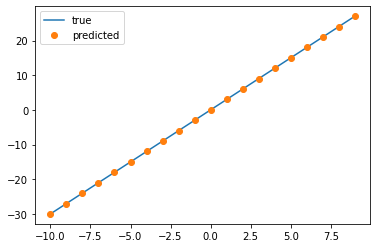

In [15]:
## Let's create a clean data set that we will fit a line to.
slope = 3
X = np.arange(-10, 10)
y = slope*X
## Need to reshape the inputs to be 2D (this is common in ML algorithms)
X = X.reshape(-1,1)

## Then we use the linear regression method to fit the data
theta, y_hat = linear_regression(X,y)

## Finally let's analyze the results and see how they compare to the
## true data
print ("The given slope is ", slope, " and the predicted slope is ", theta[0])
print("The error between the true and predicted data is", np.average((y-y_hat)**2))
plt.plot(X, y, label="true")
plt.plot(X, y_hat, 'o', label="predicted")
plt.legend()

So it seems that our code can exactly fit a clean data set which is a simple line.  So now let's complicate things!  First, let's add some noise into the data set.  This will increase the error of our algorithm, but hopefully not too much.  The algorithm should still be able to generalize to noisy data.  

Next, let's try to fit something that's not a simple line.  However, this will require us to use a design matrix because an unmodified input can only return a scaled version of the input.  If you don't believe me go back to the original equations and try to work this out.  A design matrix has columns which roughly correspond to the terms in the function we are trying to fit.

**EXERCISE:** The below code cell fits a noisy polynomial using linear regression.  Go through each line of code before you run it and make sure you understand what it is doing.

The values of theta are [ 3.02448074  3.95037455 -0.20691879 -0.27121257]
On clean data the values of theta should be [3.0  4.0  0.0  0.0]
The error between the true and predicted data is 7.638357951345877


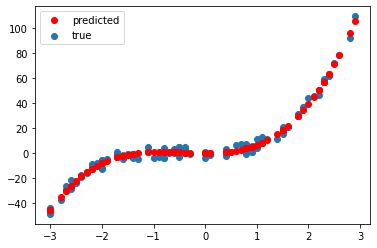

In [24]:
## Next let's create a noisy data set that we will fit a line to.
## We won't get an exact fit due to the noise, but it will give
## us an idea how well the algorithm can generalize.
X = np.random.randint(-30, 30, size=(100))/10
y = 3*X**3 + 4*X**2
## The percentage of noise to addd to the output data
noise = 0.05
if noise != 0:
    y = [i + np.random.randint(-noise*np.max(y), noise*np.max(y)) for i in y]

# Creating the design matrix of the form x^3 + x^2 + x + 1 (theta will
# be add the coefficients in front of these terms).
fourth_col = np.ones(len(X))
third_col = X
second_col = X**2
first_col = X**3
X_design = np.matrix([first_col, second_col, third_col, fourth_col])
X_design = np.transpose(X_design)

## Then we use the linear regression method to fit the data
theta, y_hat = linear_regression(X_design,y)

## Finally let's analyze the results and see how they compare
print("The values of theta are", theta)
print("On clean data the values of theta should be [3.0  4.0  0.0  0.0]")
print("The error between the true and predicted data is", np.average((y-y_hat)**2))
plt.scatter(X, y, label="true")
plt.plot(X, y_hat, 'ro', label="predicted")
plt.legend()

**EXERCISE:** Run the above code cell with various values of noise and see how the algorithm adapts to progressively noisier data.

**EXERCISE:** In the code cell below create any data set you like (clean or noisy) and then use the `linear_regression` function to fit it.  Analyze the results through a combination of printing the results and creating graphs.  Use the above to code cells as examples.

### Implement Using Scikit-Learn

SciKit-Learn is a Python machine learning library that makes implementing many machine learning methods, including linear regression, very simple.  In most cases it only takes a few lines!  You can find the documentation for the Scikit-Learn linear regression implementaiton [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).  The only parameter you may want to change is `normalize`.  Sometimes normalizing a data set can yield a better fit.

**EXERCISE:** The below code uses Scikit-Learn to fit the same polynomial as before.  Go through the code and make sure you know what each lines does.

The error between the true and predicted data is 7.564276985995604


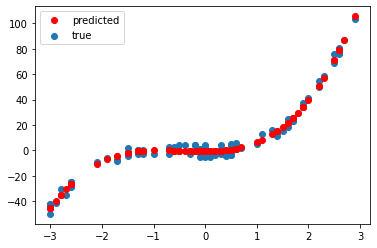

In [65]:
from sklearn.linear_model import LinearRegression

## Next let's create a noisy data set that we will fit a line to.
X = np.random.randint(-30, 30, size=(100))/10
y = 3*X**3 + 4*X**2
noise = 0.05
if noise != 0:
    y = [i + np.random.randint(-noise*np.max(y), noise*np.max(y)) for i in y]

# Creating the design matrix
fourth_col = np.ones(len(X))
third_col = X
second_col = X**2
first_col = X**3
X_design = np.matrix([first_col, second_col, third_col, fourth_col])
X_design = np.transpose(X_design)


lr = LinearRegression()
lr.fit(X_design, y)
y_hat = lr.predict(X_design)

## Finally let's analyze the results and see how they compare
print("The error between the true and predicted data is", np.average((y-y_hat)**2))
plt.scatter(X, y, label="true")
plt.plot(X, y_hat, 'ro', label="predicted")
plt.legend()

**EXERCISE:** Compare the results of the Scikit-Learn implementation to the function we created from scratch.  It may be easier to do this if you remove the noise from both data sets.

**EXERCISE:** In the below code cell use the SciKit-Learn linear regression implementation to fit any data set.  Analyze the results.  Try running your code with the `normalize` parameter set to `False` and then set to `True` and compare the results.

## Ridge Regression

### The Mathematics

Ridge regression has the same form for its output as linear regression:

$$\hat{y} = X\theta$$

The difference between the two methods lies in the loss function.  Ridge regression is a regularized form of linear regression.  Given that the linear regression loss function is the basic mean-squared error function, then the ridge regression loss function just adds a regularization term to the end:


$$J(\theta) = \frac{1}{N}\sum_{i=0}^{N-1}(y_i - \hat{y}_i)^2 + \alpha\sum_{i=0}^{N-1} |\theta_i|^2$$

  The regularization term is simply the L2 norm of the parameters.  Note that sometimes the strength of the regularization is written as ɑ/2.

One of the benefits of using ridge regression over linear regression is that the regularization term in the ridge regression loss function introduces a small about of bias to the algorithm.  The amount of bias added is controlled by the strength of the regularization, ɑ.  Because a small bias is added to the algorithm, this results in a large drop in the variance (bias-variance tradeoff).  Basically this means that ridge regression algorithms are better than linear regression algorithms at generalizing results when new data is encountered.

We can find the optimal values of $\theta$ using the same process as in linear regression.  This leads to the optimal values of theta being:

$$\theta_{Ridge} = (X^TX - \alpha I)^{-1}X^Ty,$$

where I is the identity matrix.

Note that if $\alpha$ = 0 then you recover the linear regression equations.

### Implement from Scratch

This function is very similar to the function for implementing linear regression, just with a small change to the equation for theta to add in the $\alpha$ parameter.  

**EXERCISE:** Go through the below function and make sure you understand each line.  Make sure you can relate each line to the analytical equation it relates to.


In [5]:
def ridge_regression (X, y, alpha):
    """
        Inputs:
            X (a list or NumPy array): the inputs or design matrix
            y (a list or NumPy array): the known outputs
            alpha (a float): the strength of the regularization
        Returns:
            theta (a 1D NumPy array): the optimized ridge regression
                parameters
            y_hat (a 1D NumPy array): the predicted outputs
        Performs ridge regression on a given data set and
        returns the optimized parameters and the output of 
        the algorithms
    """
    rows, cols = np.asarray(X).shape 
    # Find the optimized parameters and then format
    theta = np.linalg.inv(np.transpose(X)@X - alpha*np.eye(cols))@np.transpose(X)@y
    theta = np.asarray(theta).flatten()
    # Create the output of the linear regresion algorithm
    y_hat = X @ theta
    y_hat = np.asarray(y_hat).flatten()
    # Return the optimized parameters the the output
    return theta, y_hat

Now let's test our ridge regression function on the same polynomial as before!

**EXERCISE:** Go through the below code cell and make sure you understand what each line does.

The values of theta are [ 2.91214203  4.06532738  0.43412438 -1.24109444]
On clean data the values of theta should be [3.0  4.0  0.0  0.0]
The error between the true and predicted data is 4.830509908948842


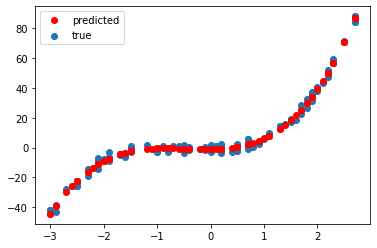

In [58]:
## Next let's create a noisy data set that we will fit a line to.
X = np.random.randint(-30, 30, size=(100))/10
y = 3*X**3 + 4*X**2
noise = 0.05
if noise != 0:
    y = [i + np.random.randint(-noise*np.max(y), noise*np.max(y)) for i in y]

# Creating the design matrix
fourth_col = np.ones(len(X))
third_col = X
second_col = X**2
first_col = X**3
X_design = np.matrix([first_col, second_col, third_col, fourth_col])
X_design = np.transpose(X_design)


## Then we use the linear regression method to fit the data
theta, y_hat = ridge_regression(X_design, y, 0.01)

## Finally let's analyze the results and see how they compare
print("The values of theta are", theta)
print("On clean data the values of theta should be [3.0  4.0  0.0  0.0]")
print("The error between the true and predicted data is", np.average((y-y_hat)**2))
plt.scatter(X, y, label="true")
plt.plot(X, y_hat, 'ro', label="predicted")
plt.legend()

In order to fully test how the $\alpha$ parameter affects the results of the ridge regression algorithm, let's test several different values of $\alpha$ using a for loop.  This is a process called hyperparameter tuning (testing various combinations of a machine learning algorithm's parameters to see which combination gives the best result.  Remember that $\alpha$=0 corresponds to linear regression.

**EXERCISE:** Go through the below code and make sure you understand what each line does.

In [63]:
## Next let's create a noisy data set that we will fit a line to.
X = np.random.randint(-30, 30, size=(10))/10
y = 3*X**3 + 4*X**2
noise = 0.1
if noise != 0:
    y = [i + np.random.randint(-noise*np.max(y), noise*np.max(y)) for i in y]

# Creating the design matrix
fourth_col = np.ones(len(X))
third_col = X
second_col = X**2
first_col = X**3
X_design = np.matrix([first_col, second_col, third_col, fourth_col])
X_design = np.transpose(X_design)

for alpha in [10, 1.0, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0]:
    ## Then we use the linear regression method to fit the data
    theta, y_hat = ridge_regression(X_design,y, alpha)
    print ("With alpha =", alpha, "the error is", np.average((y-y_hat)**2))



With alpha = 10 the error is 8.269682223376929
With alpha = 1.0 the error is 5.691587212059363
With alpha = 0.1 the error is 5.670946926263267
With alpha = 0.01 the error is 5.670744799203172
With alpha = 0.001 the error is 5.670742782134649
With alpha = 0.0001 the error is 5.670742761968153
With alpha = 1e-05 the error is 5.670742761766501
With alpha = 0 the error is 5.670742761764464


**EXERCISE:** In the below code cell perform the same type of hyperparameter tuning but on a different data set.  Test at least four different parameters of $\alpha$ including $\alpha$=0 to compare ridge regression to linear regression.

### Implement Using Scikit-Learn

**EXERCISE:** The Scikit-Learn implementation works in much the same way as the linear regression implementation.  You can find the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge).  Typically the only parameters you want to change are `alpha` and maybe `normalize`.  Go through the below code and make sure you understand it.

The error between the true and predicted data is 7.432181611741555


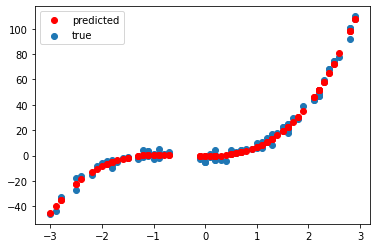

In [66]:
from sklearn.linear_model import Ridge

## Next let's create a noisy data set that we will fit a line to.
X = np.random.randint(-30, 30, size=(100))/10
y = 3*X**3 + 4*X**2
noise = 0.05
if noise != 0:
    y = [i + np.random.randint(-noise*np.max(y), noise*np.max(y)) for i in y]

# Creating the design matrix
fourth_col = np.ones(len(X))
third_col = X
second_col = X**2
first_col = X**3
X_design = np.matrix([first_col, second_col, third_col, fourth_col])
X_design = np.transpose(X_design)


rr = Ridge(alpha=0.01)
rr.fit(X_design, y)
y_hat = rr.predict(X_design)

## Finally let's analyze the results and see how they compare
print("The error between the true and predicted data is", np.average((y-y_hat)**2))
plt.scatter(X, y, label="true")
plt.plot(X, y_hat, 'ro', label="predicted")
plt.legend()

**EXERCISE:** In the below code cell use the SciKit-Learn ridge regression implementation to fit any data set.  Analyze the results.  Try running your code with various values of `alpha` and with the `normalize` parameter set to `False` and then set to `True` and compare the results.

## Extrapolations with Machine Learning

Machine learning is typically not used for extrapolation, and there is a reason of this.  In a standard machine learning problem you take a set of inputs X over some range and you give them to the machine learning algorithm and you ask it to use those inputs to best match the corresponding set of outputs.  Thus it learns the relationship between X and y, but only over a certain range.  Algorithms tend to have bad performance outside of their training range.  Part of my thesis research involves finding ways to improve a machine learning algorithm's performance on extrapolations.  Note, while I could have chosen to work with more popular and complicated machine learning algorithms like neural networks, I instead do all of my work with ridge regression because of its simplicity and ease of customization.

## Sequential Regression Analysis (My Thesis Code)

Sequential Regression Extrapolation (SRE) is a series of Python files that allows for data to be accurately extrapolated using the machine learning algorithms linear regression and ridge regression as well as a data formatting style called sequential data formatting (described below).  Though machine learning is not typically used for extrapolations, combining the regression algorithms with sequential data formatting enables the machine learning algorithms to learn long term behavior in the data and thus accurately make predictions far outside of its training range.  

#### Sequential Data Formatting

SRE also makes use of a method of data formatting called time-series formatting, which is often seen in time-series machine learning applications and recurrent neural networks.  In time-series data formatting, instead of feeding a machine learning algorithm data points of the form (t1, y1), (t2, y2), (t3, y3), etc (where t1, t2, t3 are ordered by time), time series formatting insteads formats the data such that each data point as the following form: ((y1, y2, ...., yn) yn+1) where y1, y2, etc come from time ordered data points and n is a hyperparameter known as the length of the sequence.  n can be any integer greater than one.  The larger n is, the better the machine learning algorithm can learn the time series pattern, but the less points in the formatted data series.  Since not all applications of these codes deal with time ordered data, this method of data formatting will instead be refered to as sequential data formatting, where the data set is ordered based on some x data set.

**EXERCISE:** To explore sequential regression extrapolation, consider the below example which uses the data formatting function from SRE.  Try running this code with various values of `seq`.  You can also go look at the code for `format_sequential_data` in the `Support.py` file.

In [68]:
from Support import *

data = np.arange(0, 100)
X, y = format_sequential_data (data, seq=2)

print ('i ', 'X   ', 'y')
for i in range(0, 10):
    print(i, X[i], y[i])

i  X    y
0 [0 1] 2
1 [1 2] 3
2 [2 3] 4
3 [3 4] 5
4 [4 5] 6
5 [5 6] 7
6 [6 7] 8
7 [7 8] 9
8 [8 9] 10
9 [ 9 10] 11


## Let's Do Some Extrapolations!

To test how well sequential data formatting combines with ridge regression, lets apply it to a sine function.  A sine function has a very regular pattern, so this should be a good test to see if the algorithm can actually learn the pattern in a data set.  We start with a total data set, represented by the solid blue line of the function y = 4sin(3x+2) between the values of 0 and 6 pi, with a step size of 0.1,  This yields 189 total data points to work with.  We also start with a training data set, represented by the light blue box, that contains only the first 20 data points.  The idea is to train the ridge regression algorithm using sequential data formatting on the data within the blue box and see how well it can predict the data outside of the blue box.  Note that for this analysis we will typically use an alpha value of zero, which actually makes the ridge regression algorithm a linear regression one.  This values was selected through previous hyperparameter tuning experiments on this function.  Feel free to try other values of alpha as well!

**IMPORTANT NOTE:** SRE works only if all of the data arrays that are given to it are lists.  When using SRE its okay to generate test data usign NumPy, just use the `.tolist()` method before giving it to an SRE regression function.

Before we start with an SRE implementation, let's explore why SRE is neccessary.  First let's try to solve the problem using linear regression with no design matrix.

**EXERCISE:** Go through the below code cell and make sure you understand what it is doing before you move on.

Starting Linear Regression

Input is 1D list.  Reshaping to 2D list.

Solving Using Closed Form Ridge Regression
Iterative Solving Methods May be Implemented in later versions
Performing Modified Ridge Regression
Data Normalization and Fitting an Intercept Will Be Used
The error between the true and predicted data is 39.10003691612425


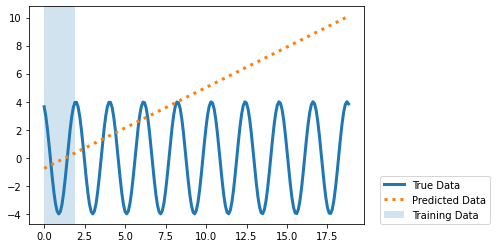

In [48]:
## Next let's create a noisy data set that we will fit a line to.
X = np.arange(0, 6*np.pi, 0.1)
y = 4*np.sin(3*X+2)

## Gather the first 20 data points from each set as the training data
training_len = 20
X_train = X[0:training_len]
y_train = y[0:training_len]

## Need to reshape in order to feed into the ridge regression algorithm
X_train = X_train.reshape(-1,1)
X = X.reshape(-1,1)

## Using the ridge regression implementation from RR.  You can find the code for it
## in the file Regresion.py
rr = RR(alpha=0.01)
rr.fit(X_train, y_train)
y_hat = rr.predict(X)

## Finally let's analyze the results and see how they compare
print("The error between the true and predicted data is", np.average((y-y_hat)**2))
# Plot the predicted data and save the image
plt.plot(X, y, linewidth=3, label="True Data")
plt.axvspan(X_train[0], X_train[-1], alpha=0.2, label="Training Data")
plt.plot(X, y_hat, ':', label="Predicted Data", linewidth=3)
plt.legend(loc=(1.05,0))

So linear regression without a design matrix does a terrible job of extrapolating the data, but it can only make a straight line so we would expect this.  Let's see what happens when we add a design matrix.  The trouble with this problem however is that two of the parameters we need to fit are inside the cosine function, so we will likely not be able to create a design matrix that matches this pattern very well.

**EXERCISE:** Go through the below code cell and make sure you understand what it is doing before you move on.

Starting Linear Regression
Solving Using Closed Form Ridge Regression
Iterative Solving Methods May be Implemented in later versions
Performing Modified Ridge Regression
Data Normalization and Fitting an Intercept Will Be Used
The error between the true and predicted data is 10.709252289854572


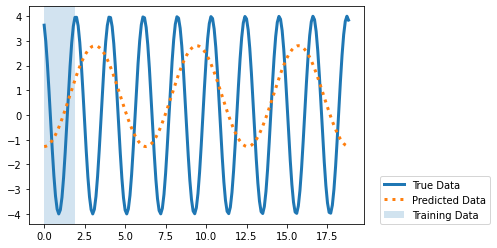

In [47]:
## Next let's create a noisy data set that we will fit a line to.
X = np.arange(0, 6*np.pi, 0.1)
y = 4*np.sin(3*X+2)

training_len = 20
X_train = X[0:training_len].tolist()
y_train = y[0:training_len].tolist()


# Creating the design matrix that matches the given data set the best we can
# Training data only
second_col = np.ones(len(X_train))
first_col = np.cos(X_train)
X_design_train = np.matrix([first_col, second_col])
X_design_train = np.transpose(X_design_train).tolist()

# Creating the design matrix that matches the given data set the best we can
# Whole data set
second_col = np.ones(len(X))
first_col = np.cos(X)
X_design_test = np.matrix([first_col, second_col])
X_design_test = np.transpose(X_design_test).tolist()

## Using the ridge regression implementation from RR.  You can find the code for it
## in the file Regresion.py.  Note I used an alpha value of 0.01 here because an 
## alpha value of 0.0 creates a singular matrix that cannot be inverted.
rr = RR(alpha=0.01)
rr.fit(X_design_train, y_train)
y_hat = rr.predict(X_design_test)

## Finally let's analyze the results and see how they compare
print("The error between the true and predicted data is", np.average((y-y_hat)**2))
# Plot the predicted data and save the image
plt.plot(X, y, linewidth=3, label="True Data")
plt.axvspan(X_train[0], X_train[-1], alpha=0.2, label="Training Data")
plt.plot(X, y_hat, ':', label="Predicted Data", linewidth=3)
plt.legend(loc=(1.05,0))

With the design matrix we were able to get more of a wave pattern, but it still does not match the data set.  Now, after seeing what happens when we use the traditional methods, let's try the SRE codes.  First let's import SRE.  Its currently a series of four Python files: `Analysis` which contains functionality for graphing and error analysis, `Extrapolate` which contains the functions that extrapolate using the sequential data formatting, `Regression` which contains a from-scratch implementation of linear and ridge regression as well as another regression algorithm called kernel ridge regression, and `Support` which contains an assortment of functions that the other files need, including the function for forming data into the sequential regression format.

**EXERCISE:** Briefly look through the four Python files if you are interested in how they work and the classes and functions contained in each.

In [11]:
from Analysis import *
from Extrapolate import *
from Regression import *
from Support import *

**EXERCISE:** Now let's test SRE on on the same problem.  Go through the below code and make sure you understand how it works.  You may want to look at the code in the SRE files that is used below.

Starting Linear Regression
Solving Using Closed Form Ridge Regression
Iterative Solving Methods May be Implemented in later versions
Performing Modified Ridge Regression
Data Normalization and Fitting an Intercept Will Be Used
The MSE score between the predicted and true data is 3.1058763740965544e-25
The R2 score between the predicted and true data is 1.0


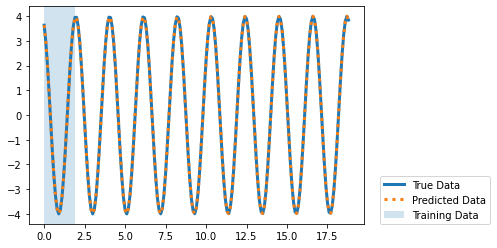

In [69]:
# Create the total data set and plot it
Xtot = np.arange(0, 6*np.pi, 0.1)
ytot = 4*np.sin(3*Xtot+2)

training_len = 20
X_train = Xtot[0:training_len].tolist()
y_train = ytot[0:training_len].tolist()

# Format only the y component of the training data using sequential
# data formatting
X, y = format_sequential_data (y_train, seq=2)

# Initialize and instance of the ridge regression classs and train
# it using the formatted data
R = RR(0.0)
R.fit(X, y)

## sequential_extrapolate uses the ridge regression algorithm fit above to sequentially predict new data
## points to the desired lenght.  Take a look at its implementation in the Extrapolate.py file.
y_test = sequential_extrapolate(R, y_train, len(ytot), seq=2,\
    isAutoRegressive = False, isErrorAnalysis = True, y_true = ytot)

# Plot the predicted data and save the image
plt.plot(Xtot, ytot, linewidth=3, label="True Data")
plt.axvspan(X_train[0], X_train[-1], alpha=0.2, label="Training Data")
plt.plot(Xtot, y_test, ':', label="Predicted Data", linewidth=3)
plt.legend(loc=(1.05,0))

Even though ridge regression is seen as a rather simple and weak machine learning tool, with the proper data set-up for to intended application, it can be very powerful!

**EXERCISE:** To see the true power of SRE, start gradually decreasing the size of the training data set and see what happens to the error.  

Note that even with the starting size of the training data set being 20 data points, this is still an exceptionally small data set by machine learning standards.  SRE has been tested on very small data sets and performs well.  The goal of SRE is to apply it to many-body physics applications.  The data sets in these applications are typically quite small because generating new data points is very expensive.  This has previously prevented machine learning from being applied to the field, but methods like SRE which can perform will on small data sets have large applicability in the field.  The hope is that SRE's extrapolation abilities can be applied to many-body problems where generating new data points will take a significant amount of time but SRE can generate the same data points significantly faster and with a physically acceptable error.

## Further Reading
* SRE GitHub Repo located [here](https://github.com/butler-julie/SRE).  Also includes examples on many-body physics data.
* [Recommended ML textbook](https://www.oreilly.com/library/view/hands-on-machine-learning/9781491962282/) with good sections of the regression algorithms.
* If you are interested in this type of application for machine learning, please contact me for more resources and information!